# Austin Animal Center Intakes and Outcomes

##### Alona Varshal

Data Analysis Project

July 2016

##### This is my first data analysis project. I obtained the data from the Austin Open Data Portal (https://data.austintexas.gov/).

#### Questions:

A. Intakes
- What is the distribution of animal types among the intakes? 
- What is the intake type that is most predominant?
- Predominant dog breed among strays? among surrendered?


B. Outcomes
- Among dogs, what is breed is the most adopted?
- 


# Animal Intakes

Desciption

(obtained from https://data.austintexas.gov/Health/Austin-Animal-Center-Intakes/wter-evkm)

Animal Center Intakes from Oct, 1st 2013 to present. Intakes represent animals brought to the center by citizens or Animal Services staff. Animals may be brought to the center as lost, injured or for the purpose of adoption. Animals may also be brought to the center as Public Assist. The found location is often only an estimation of where the animal was found. All animals receive a unique Animal ID during intake.

This data set replaces all previous Animal Center Intakes data sets.

THIS DATA SET IS STILL IN BETA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
animalintake_df = pd.DataFrame.from_csv('../austin_animal_center/austin_animal_center_intakes.csv', index_col=None, encoding='utf=8')

In [4]:
animalintake_df.head(2)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A521520,Nina,10/01/2013 07:51:00 AM,10/01/2013 07:51:00 AM,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan
1,A664235,NaN,10/01/2013 08:33:00 AM,10/01/2013 08:33:00 AM,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White


In [11]:
animalintake_df[animalintake_df.Name.notnull()].head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A521520,Nina,10/01/2013 07:51:00 AM,10/01/2013 07:51:00 AM,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan
4,A664233,Stevie,10/01/2013 08:53:00 AM,10/01/2013 08:53:00 AM,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White
7,A664256,*Donnie,10/01/2013 10:59:00 AM,10/01/2013 10:59:00 AM,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,17 years,Domestic Shorthair Mix,Brown Tabby/White
8,A664257,Pippin,10/01/2013 11:01:00 AM,10/01/2013 11:01:00 AM,Burleson in Travis (TX),Stray,Normal,Dog,Intact Female,4 years,Podengo Pequeno Mix,Black
10,A664258,Sylvio,10/01/2013 11:15:00 AM,10/01/2013 11:15:00 AM,Fm 1626/Manchaca Rd in Travis (TX),Stray,Normal,Dog,Neutered Male,7 years,Weimaraner Mix,Silver


### Finding if there are duplicates / Removing duplicates

In [12]:
animalintake_df_dupsremoved = animalintake_df.drop_duplicates()

In [6]:
len(animalintake_df_dupsremoved)

52052

In [7]:
len(animalintake_df)

52061

In [9]:
# There are duplicates!

In [13]:
animalintake_df_dupsremoved["Animal ID"].value_counts().head()

A706536    10
A694501     8
A683108     7
A671704     7
A701901     6
Name: Animal ID, dtype: int64

#### As can be seen above, there are still some that occur repeatedly.

In [14]:
# Shortening the DataFrame name:
animalintakes_df = animalintake_df_dupsremoved

### Looking closely at the repeating animal IDs:

In [14]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A706536']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
32258,A706536,Butch,06/30/2015 10:55:00 AM,06/30/2015 10:55:00 AM,2820 S Lamar in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
33347,A706536,Butch,07/20/2015 10:19:00 AM,07/20/2015 10:19:00 AM,5100 West Us Hwy 290 Svrd Wb in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
33725,A706536,Butch,07/27/2015 04:02:00 PM,07/27/2015 04:02:00 PM,5100 West Ben White Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
38403,A706536,Butch,10/21/2015 05:07:00 PM,10/21/2015 05:07:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
41169,A706536,Butch,12/20/2015 02:06:00 PM,12/20/2015 02:06:00 PM,5100 Us-290 in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
41833,A706536,Butch,01/08/2016 11:37:00 AM,01/08/2016 11:37:00 AM,5100 Us 290 #302 in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
43329,A706536,Butch,02/15/2016 12:38:00 PM,02/15/2016 12:38:00 PM,Austin (TX),Stray,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
43589,A706536,Butch,02/22/2016 09:46:00 AM,02/22/2016 09:46:00 AM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
44699,A706536,Butch,03/18/2016 10:44:00 AM,03/18/2016 10:44:00 AM,10101 S 1St St #8 in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
45113,A706536,Butch,03/26/2016 01:50:00 PM,03/26/2016 01:50:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White


In [15]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A694501']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
22740,A694501,Penelope,12/29/2014 02:27:00 PM,12/29/2014 02:27:00 PM,Finch Trl And Norfolk in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever Mix,Black/White
24084,A694501,Penelope,02/02/2015 12:47:00 PM,02/02/2015 12:47:00 PM,Garwood And N Pleasant Valley in Austin (TX),Stray,Normal,Dog,Spayed Female,7 months,Labrador Retriever Mix,Black/White
24288,A694501,Penelope,02/07/2015 01:53:00 PM,02/07/2015 01:53:00 PM,2805 Norfolk Drive in Austin (TX),Stray,Normal,Dog,Spayed Female,7 months,Labrador Retriever Mix,Black/White
28678,A694501,Penelope,05/12/2015 01:11:00 AM,05/12/2015 01:11:00 AM,2816 Norfolk Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,10 months,Labrador Retriever Mix,Black/White
38296,A694501,Penelope,10/19/2015 04:32:00 PM,10/19/2015 04:32:00 PM,Gettysburg Dr And Seminary Ridge Dr in Austin ...,Stray,Normal,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White
40184,A694501,Penelope,11/24/2015 10:02:00 PM,11/24/2015 10:02:00 PM,Goldbridge And Norfolk in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White
41134,A694501,Penelope,12/19/2015 03:53:00 PM,12/19/2015 03:53:00 PM,8106 Brodie Ln in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White
42250,A694501,Penelope,01/18/2016 07:08:00 AM,01/18/2016 07:08:00 AM,Inridge Dr/ Westgate in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White


In [16]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A683108']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
13788,A683108,Clyde,07/07/2014 01:02:00 PM,07/07/2014 01:02:00 PM,6801 S I H 35 in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Australian Cattle Dog/Akita,Brown/White
15211,A683108,Clyde,07/29/2014 05:52:00 PM,07/29/2014 05:52:00 PM,1941 E. William Cannon in Austin (TX),Stray,Normal,Dog,Neutered Male,7 years,Australian Cattle Dog/Akita,Brown/White
18952,A683108,Clyde,10/07/2014 12:22:00 PM,10/07/2014 12:22:00 PM,4715 S Congress in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Australian Cattle Dog/Akita,Brown/White
19792,A683108,Clyde,10/24/2014 07:21:00 AM,10/24/2014 07:21:00 AM,Ih 35 & William Cannon in Austin (TX),Stray,Normal,Dog,Neutered Male,7 years,Australian Cattle Dog/Akita,Brown/White
23628,A683108,Clyde,01/21/2015 03:17:00 PM,01/21/2015 03:17:00 PM,11940 Manchaca Rd in Austin (TX),Stray,Normal,Dog,Neutered Male,7 years,Australian Cattle Dog/Akita,Brown/White
33092,A683108,Clyde,07/15/2015 11:52:00 AM,07/15/2015 11:52:00 AM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,8 years,Australian Cattle Dog/Akita,Brown/White
36054,A683108,Clyde,09/07/2015 02:01:00 PM,09/07/2015 02:01:00 PM,South First And Barton Springs in Austin (TX),Stray,Normal,Dog,Neutered Male,8 years,Australian Cattle Dog/Akita,Brown/White


In [17]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A671704']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
20517,A671704,Chloe,11/08/2014 11:23:00 AM,11/08/2014 11:23:00 AM,755 Springdale Road in Austin (TX),Stray,Normal,Dog,Intact Female,2 years,Pit Bull/Boxer,Black/White
29496,A671704,Chloe,05/23/2015 07:07:00 AM,05/23/2015 07:07:00 AM,812 Springdale in Austin (TX),Stray,Normal,Dog,Spayed Female,3 years,Pit Bull/Boxer,Black/White
29732,A671704,Chloe,05/27/2015 11:01:00 AM,05/27/2015 11:01:00 AM,4900 Gonzales St in Austin (TX),Stray,Normal,Dog,Spayed Female,3 years,Pit Bull/Boxer,Black/White
29935,A671704,Chloe,05/29/2015 12:47:00 PM,05/29/2015 12:47:00 PM,812 Springdale in Austin (TX),Stray,Normal,Dog,Spayed Female,3 years,Pit Bull/Boxer,Black/White
33095,A671704,Chloe,07/15/2015 12:16:00 PM,07/15/2015 12:16:00 PM,E 11Th St & Navasota St in Austin (TX),Stray,Normal,Dog,Spayed Female,3 years,Pit Bull/Boxer,Black/White
44992,A671704,Chloe,03/24/2016 04:20:00 AM,03/24/2016 04:20:00 AM,812 Springdale Rd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Pit Bull/Boxer,Black/White
47654,A671704,Chloe,05/12/2016 04:14:00 PM,05/12/2016 04:14:00 PM,Gonzales St & Mansell Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Pit Bull/Boxer,Black/White


In [18]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A701901']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
28346,A701901,Sasha,05/06/2015 09:02:00 AM,05/06/2015 09:02:00 AM,8200 Landsman in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Blue
29182,A701901,Sasha,05/19/2015 09:30:00 AM,05/19/2015 09:30:00 AM,8128 N Ih 35 in Austin (TX),Public Assist,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Blue
35884,A701901,Sasha,09/04/2015 04:55:00 PM,09/04/2015 04:55:00 PM,1801 Wells Branch in Travis (TX),Stray,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Blue
39756,A701901,Sasha,11/15/2015 01:06:00 PM,11/15/2015 01:06:00 PM,12116 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Blue
40778,A701901,Sasha,12/10/2015 01:23:00 PM,12/10/2015 01:23:00 PM,Bois D' Ard Rd/ Tower Ln in Travis (TX),Public Assist,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Blue
44838,A701901,Sasha,03/21/2016 09:23:00 AM,03/21/2016 09:23:00 AM,4892 W Us 290 in Sunset Valley (TX),Public Assist,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Blue


#### It looks like there are animals that repeatedly get taken in (or get lost)!

And Butch (along with other dogs) is a repeat offender!

### Numbers of Animal Types

In [25]:
animalintake_df["Animal Type"].value_counts()

Dog          29522
Cat          19527
Other         2799
Bird           206
Livestock        7
Name: Animal Type, dtype: int64

### Creating DataFrames of Single Animal Type

In [15]:
# Cats
cats_intake = animalintake_df[animalintake_df["Animal Type"] == "Cat"]

In [16]:
# Dogs
dogs_intake = animalintake_df[animalintake_df["Animal Type"] == "Dog"]

In [17]:
# Birds
birds_intake = animalintake_df[animalintake_df["Animal Type"] == "Bird"]

In [18]:
# Livestock
livestock_intake = animalintake_df[animalintake_df["Animal Type"] == "Livestock"]

In [19]:
# Other
others_intake = animalintake_df[animalintake_df["Animal Type"] == "Other"]

### Distrubution of Animal Types

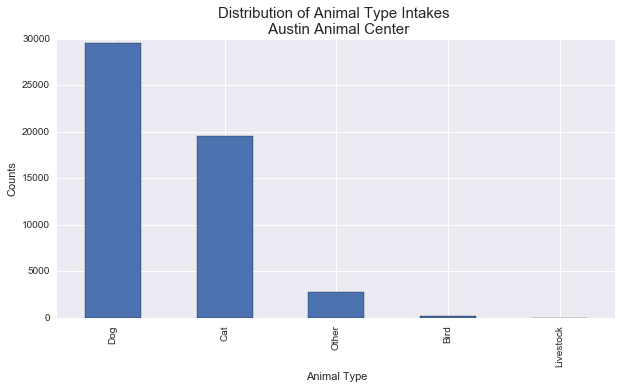

In [31]:
animalintakes_df["Animal Type"].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel("Animal Type")
plt.ylabel("Counts")
plt.title("Distribution of Animal Type Intakes \n Austin Animal Center", fontsize=15)

### Numbers of Intake Type

In [32]:
animalintakes_df["Intake Type"].value_counts()

Stray                 37035
Owner Surrender        9437
Public Assist          3117
Wildlife               2225
Euthanasia Request      238
Name: Intake Type, dtype: int64

### Distribution of Animal Intake Types

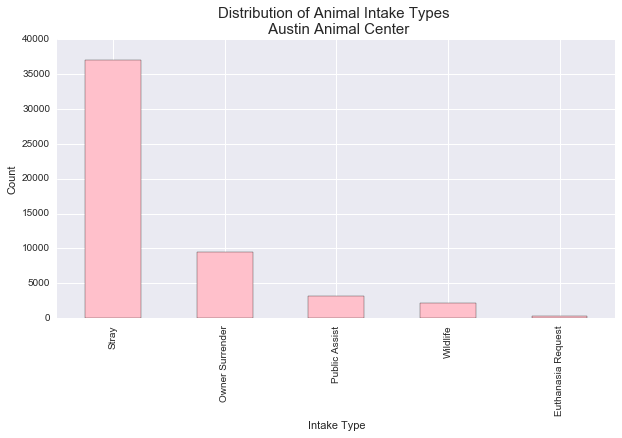

In [36]:
animalintakes_df["Intake Type"].value_counts().plot(kind='bar', figsize=(10,5), color='pink')
plt.xlabel("Intake Type")
plt.ylabel("Count")
plt.title("Distribution of Animal Intake Types \n Austin Animal Center", fontsize=15)

### Distribution of Intake Conditions

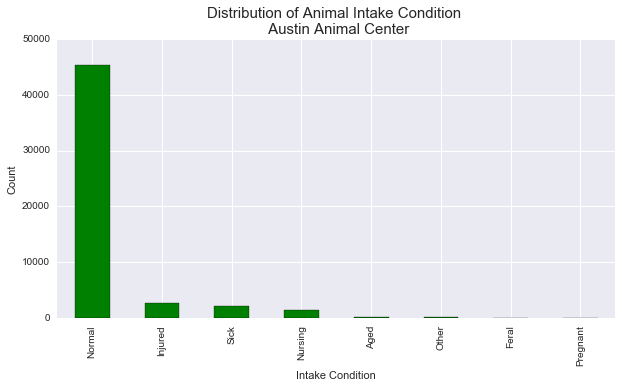

In [35]:
animalintakes_df["Intake Condition"].value_counts().plot(kind='bar', figsize=(10, 5), color='green')
plt.xlabel("Intake Condition")
plt.ylabel("Count")
plt.title("Distribution of Animal Intake Condition \n Austin Animal Center", fontsize=15)

### Distribution of Age Upon Intake

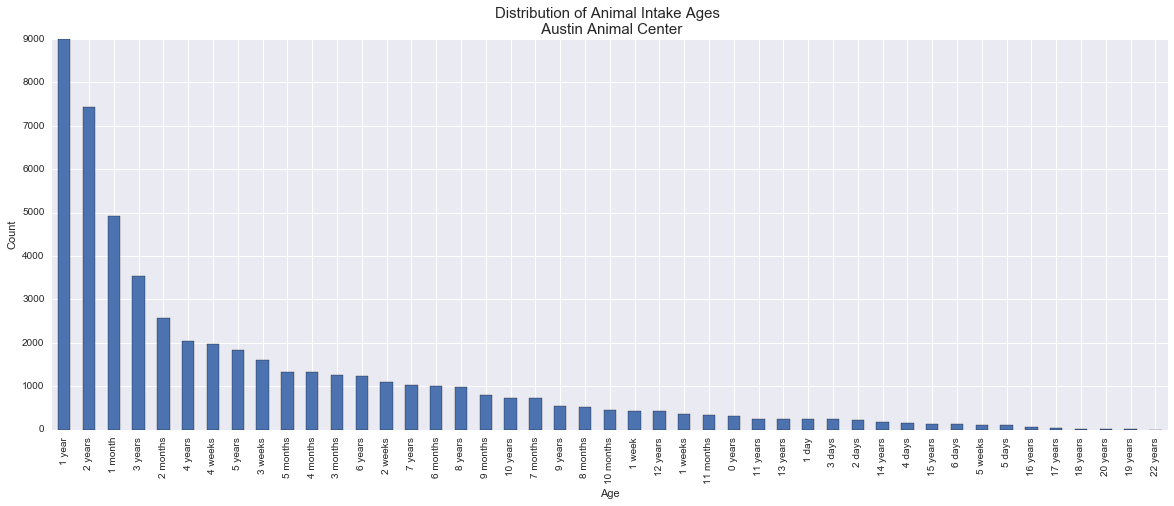

In [37]:
animalintakes_df["Age upon Intake"].value_counts().plot(kind='bar', figsize=(20,7))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Animal Intake Ages \n Austin Animal Center", fontsize=15)

### Distribution of Animal Sex Upon Intake

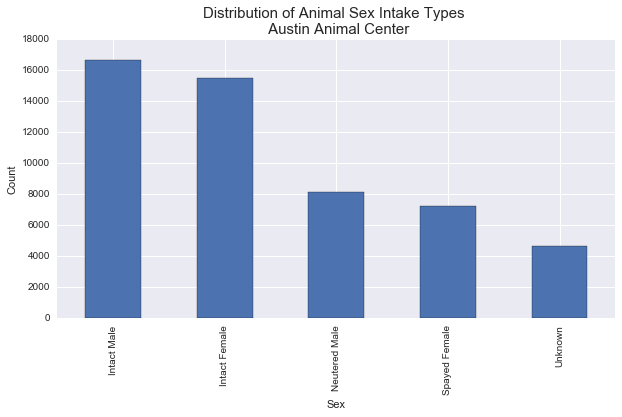

In [38]:
animalintakes_df["Sex upon Intake"].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Animal Sex Intake Types \n Austin Animal Center", fontsize=15)

## Dogs DataFrame

### Distribution of Sex Upon Intakes Among Dogs

In [20]:
dogs_intake.head(2)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A521520,Nina,10/01/2013 07:51:00 AM,10/01/2013 07:51:00 AM,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan
4,A664233,Stevie,10/01/2013 08:53:00 AM,10/01/2013 08:53:00 AM,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White


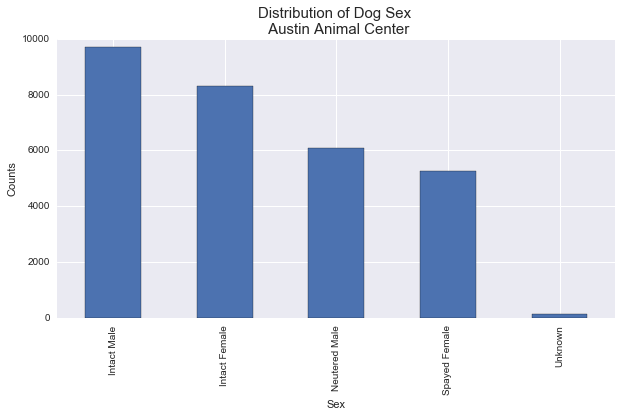

In [21]:
dogs_intake["Sex upon Intake"].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Distribution of Dog Sex \n Austin Animal Center", fontsize=15)

### Distribution of Breeds Among Dogs

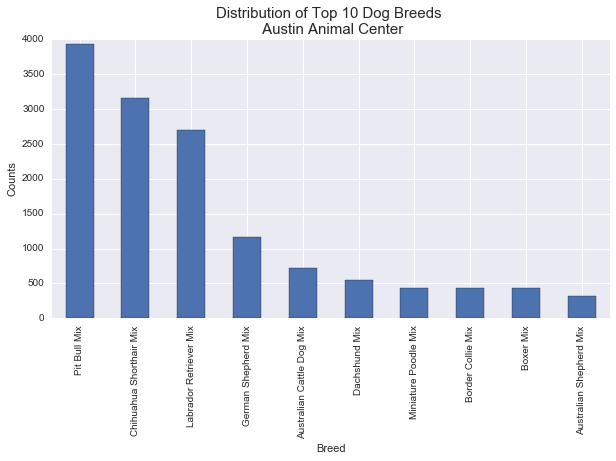

In [22]:
dogs_intake["Breed"].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.xlabel("Breed")
plt.ylabel("Counts")
plt.title("Distribution of Top 10 Dog Breeds \n Austin Animal Center", fontsize=15)

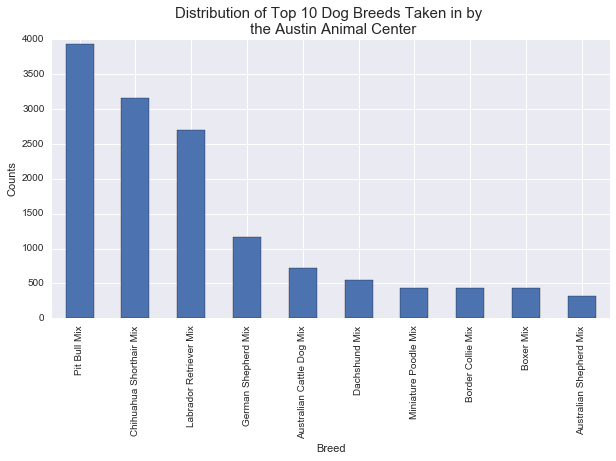

In [23]:
dogs_intake["Breed"].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.xlabel("Breed")
plt.ylabel("Counts")
plt.title("Distribution of Top 10 Dog Breeds Taken in by \n the Austin Animal Center", fontsize=15)

In [24]:
dogs_intake["Breed"].value_counts().head(10)

Pit Bull Mix                 3937
Chihuahua Shorthair Mix      3159
Labrador Retriever Mix       2697
German Shepherd Mix          1160
Australian Cattle Dog Mix     724
Dachshund Mix                 553
Miniature Poodle Mix          438
Border Collie Mix             432
Boxer Mix                     430
Australian Shepherd Mix       323
Name: Breed, dtype: int64

### Intake Types Among Dogs

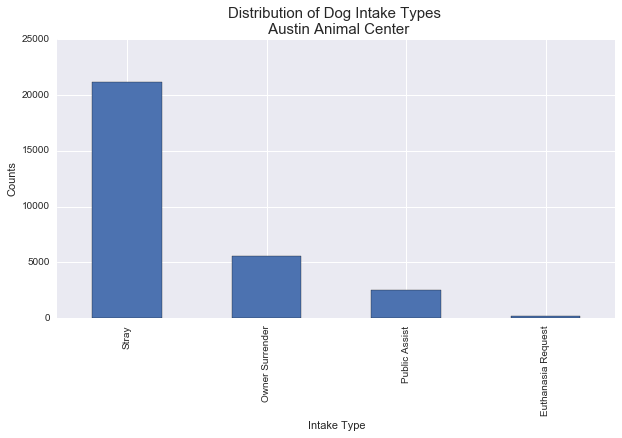

In [25]:
dogs_intake["Intake Type"].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel("Intake Type")
plt.ylabel("Counts")
plt.title("Distribution of Dog Intake Types \n Austin Animal Center", fontsize=15)

### Location where most dogs were found

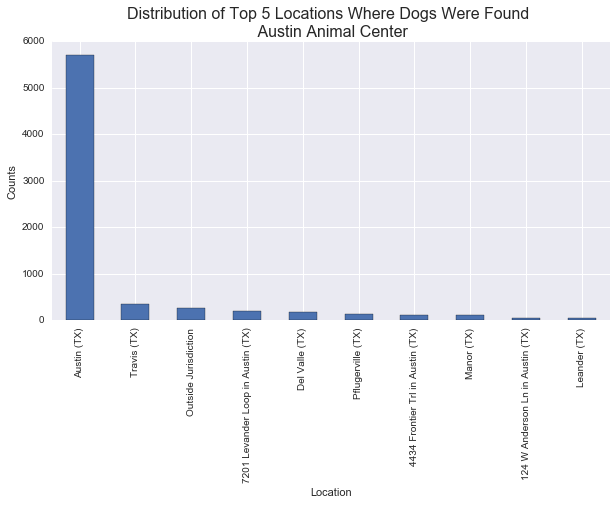

In [26]:
dogs_intake["Found Location"].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.xlabel("Location")
plt.ylabel("Counts")
plt.title("Distribution of Top 5 Locations Where Dogs Were Found \n Austin Animal Center", fontsize=16)

In [27]:
dogs_intake["Found Location"].value_counts().head(20)

Austin (TX)                           5700
Travis (TX)                            338
Outside Jurisdiction                   252
7201 Levander Loop in Austin (TX)      192
Del Valle (TX)                         165
Pflugerville (TX)                      133
4434 Frontier Trl in Austin (TX)       105
Manor (TX)                              99
124 W Anderson Ln in Austin (TX)        53
Leander (TX)                            51
12034 Research Blvd in Austin (TX)      47
12034 Research in Austin (TX)           39
1156 W Cesar Chavez in Austin (TX)      33
4434 Frontier in Austin (TX)            29
5200 Knight Cir in Austin (TX)          28
4106 N Lamar Blvd in Austin (TX)        25
4434 Frontier Trail in Austin (TX)      24
4106 N Lamar in Austin (TX)             23
Round Rock (TX)                         22
Lago Vista (TX)                         20
Name: Found Location, dtype: int64

The plot above doesn't tell us much. Cleaning of data may be needed (specify Austin, TX).

### Of all the dog owner surrenders, what is the most predominant breed?

In [51]:
dogs_intake_owner_surrender = dogs_intake[dogs_intake['Intake Type'] == "Owner Surrender"]
len(dogs_intake_owner_surrender)

5604

In [52]:
dogs_intake_owner_surrender.head(2)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
14,A651630,Heather,10/01/2013 11:23:00 AM,10/01/2013 11:23:00 AM,Outside Jurisdiction,Owner Surrender,Injured,Dog,Spayed Female,6 years,Labrador Retriever/Chinese Sharpei,Tan
28,A664274,Estrella,10/01/2013 01:48:00 PM,10/01/2013 01:48:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,8 years,Siberian Husky Mix,Buff


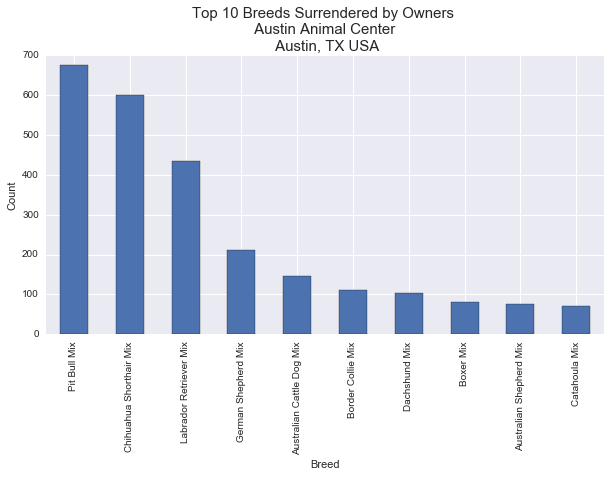

In [53]:
dogs_intake_owner_surrender["Breed"].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.xlabel("Breed")
plt.ylabel("Count")
plt.title("Top 10 Breeds Surrendered by Owners \n Austin Animal Center \n Austin, TX USA", fontsize=15)

### Predominant Dog Breeds in Strays

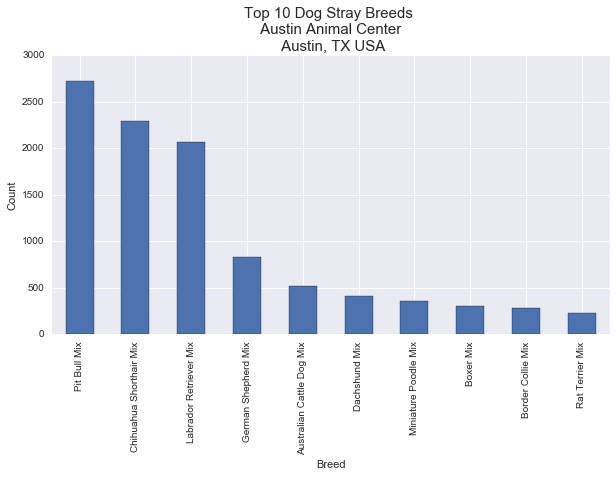

In [54]:
dogs_intake[dogs_intake['Intake Type'] == "Stray"]["Breed"].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.xlabel("Breed")
plt.ylabel("Count")
plt.title("Top 10 Dog Stray Breeds \n Austin Animal Center \n Austin, TX USA", fontsize=15)

In [55]:
len(dogs_intake[dogs_intake['Intake Type'] == "Stray"])

21203

### Among dogs taken in, what fraction was sick?

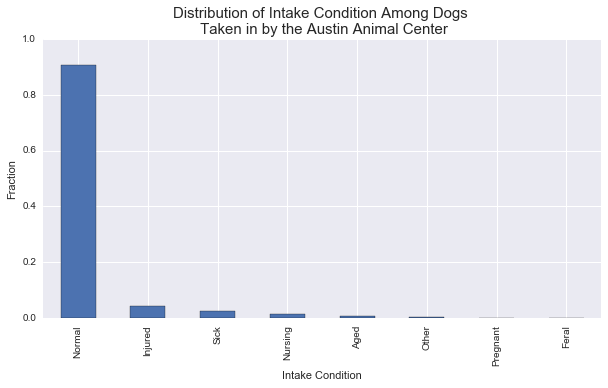

In [57]:
dogs_intake["Intake Condition"].value_counts(normalize=True).plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Intake Condition Among Dogs \n Taken in by the Austin Animal Center", fontsize=15)
plt.xlabel("Intake Condition")
plt.ylabel("Fraction")

In [58]:
sick_dogs = dogs_intake[dogs_intake["Intake Condition"] == "Sick"]

In [59]:
len(sick_dogs)

746

In [60]:
sick_dogs["Breed"].value_counts().head()

Pit Bull Mix                 130
Chihuahua Shorthair Mix      124
Labrador Retriever Mix        78
German Shepherd Mix           35
Australian Cattle Dog Mix     21
Name: Breed, dtype: int64

#### Labrador retrievers intake type distribution
Since I like labs, I would like to see if there are a lot of them being surrendered.

In [28]:
labrador = dogs_intake[dogs_intake['Breed'] == "Labrador Retriever"]

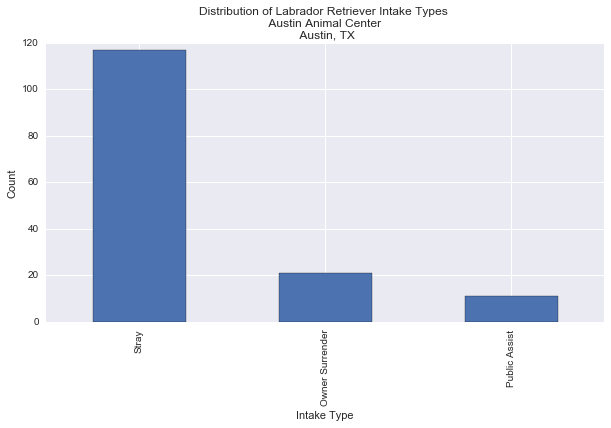

In [29]:
labrador["Intake Type"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Labrador Retriever Intake Types \n Austin Animal Center \n Austin, TX")
plt.xlabel("Intake Type")
plt.ylabel("Count")

#### Labrador pure and mix

In [30]:
labradors = dogs_intake[(dogs_intake['Breed'] == "Labrador Retriever") | (dogs_intake['Breed'] == "Labrador Retriever Mix")]

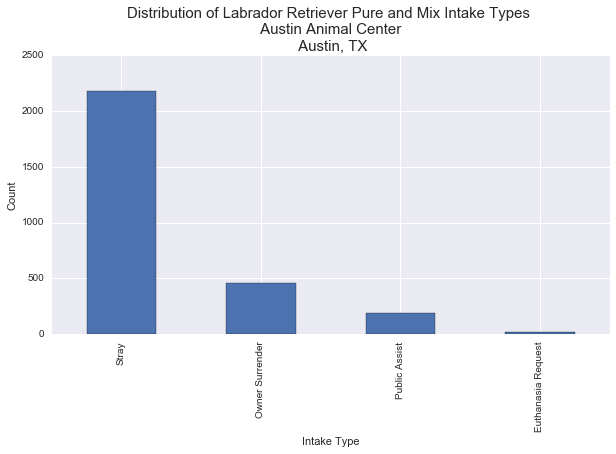

In [31]:
labradors["Intake Type"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Labrador Retriever Pure and Mix Intake Types \n Austin Animal Center \n Austin, TX", fontsize=15)
plt.xlabel("Intake Type")
plt.ylabel("Count")

In [32]:
labradors.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
113,A664375,Chevy,10/02/2013 03:52:00 PM,10/02/2013 03:52:00 PM,Austin (TX),Public Assist,Normal,Dog,Intact Male,3 years,Labrador Retriever Mix,Black
120,A664382,Chewey,10/02/2013 05:54:00 PM,10/02/2013 05:54:00 PM,South 183 in Travis (TX),Stray,Normal,Dog,Intact Female,6 months,Labrador Retriever Mix,Chocolate
155,A648134,Baby,10/03/2013 02:07:00 PM,10/03/2013 02:07:00 PM,724 Eberhart in Austin (TX),Stray,Injured,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White
156,A625774,Jumper,10/03/2013 02:10:00 PM,10/03/2013 02:10:00 PM,10211 Fm 969 Rd in Travis (TX),Stray,Injured,Dog,Neutered Male,3 years,Labrador Retriever Mix,Yellow
166,A664463,Raven,10/03/2013 06:09:00 PM,10/03/2013 06:09:00 PM,Justin And Burnet in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,Labrador Retriever Mix,Black


In [33]:
len(labradors)

2846

In [47]:
labs = labradors.set_index(['Animal ID']).sort_index()

In [49]:
labs

,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
Animal ID,,,,,,,,,,,
A221448,Tucker,10/27/2013 11:17:00 AM,10/27/2013 11:17:00 AM,Silver Spring Dr And Mesa Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,12 years,Labrador Retriever Mix,Brown/White
A245945,Boomer,07/03/2014 05:55:00 PM,07/03/2014 05:55:00 PM,Garden And Mildred in Austin (TX),Stray,Normal,Dog,Neutered Male,14 years,Labrador Retriever Mix,Tan
A245945,Boomer,05/20/2015 10:34:00 PM,05/20/2015 10:34:00 PM,7403 Blessing Ave in Austin (TX),Stray,Normal,Dog,Neutered Male,15 years,Labrador Retriever Mix,Tan
A254503,Daisy,11/09/2014 11:04:00 AM,11/09/2014 11:04:00 AM,8603 Fathom Cir in Austin (TX),Stray,Normal,Dog,Spayed Female,17 years,Labrador Retriever Mix,Tan
A256412,Beau,10/06/2013 11:33:00 AM,10/06/2013 11:33:00 AM,1001 Pres Arriba Rd in Austin (TX),Stray,Injured,Dog,Intact Male,16 years,Labrador Retriever Mix,Yellow
A268022,China,08/03/2015 12:03:00 PM,08/03/2015 12:03:00 PM,Outside Jurisdiction,Euthanasia Request,Normal,Dog,Spayed Female,13 years,Labrador Retriever Mix,Tan
A281542,George,12/23/2013 01:23:00 PM,12/23/2013 01:23:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,12 years,Labrador Retriever Mix,Black/Brown Brindle
A308771,Lili,03/01/2014 04:44:00 PM,03/01/2014 04:44:00 PM,Lamar And 31St in Austin (TX),Stray,Normal,Dog,Spayed Female,14 years,Labrador Retriever Mix,Brown
A329835,Molly,11/09/2013 04:45:00 PM,11/09/2013 04:45:00 PM,Archdale And Decker Praire Ln in Austin (TX),Stray,Normal,Dog,Spayed Female,10 years,Labrador Retriever Mix,Brown/Black


In [44]:
labs.loc['A664743']

Name                                          *Shadow
DateTime                       10/08/2013 03:33:00 PM
MonthYear                      10/08/2013 03:33:00 PM
Found Location      Teri Rd And Hwy 71 in Austin (TX)
Intake Type                                     Stray
Intake Condition                              Injured
Animal Type                                       Dog
Sex upon Intake                         Intact Female
Age upon Intake                              9 months
Breed                          Labrador Retriever Mix
Color                                           Black
Name: A664743, dtype: object

In [50]:
labs = labradors.set_index(['Animal ID', 'Intake Type']).sort_index()

In [51]:
labs

Name                DateTime  \
Animal ID Intake Type                                                
A221448   Stray                     Tucker  10/27/2013 11:17:00 AM   
A245945   Stray                     Boomer  07/03/2014 05:55:00 PM   
          Stray                     Boomer  05/20/2015 10:34:00 PM   
A254503   Stray                      Daisy  11/09/2014 11:04:00 AM   
A256412   Stray                       Beau  10/06/2013 11:33:00 AM   
A268022   Euthanasia Request         China  08/03/2015 12:03:00 PM   
A281542   Owner Surrender           George  12/23/2013 01:23:00 PM   
A308771   Stray                       Lili  03/01/2014 04:44:00 PM   
A329835   Stray                      Molly  11/09/2013 04:45:00 PM   
A329968   Stray                      Romeo  10/21/2013 03:06:00 PM   
A337859   Euthanasia Request         Benny  07/25/2014 11:00:00 AM   
A339103   Stray                        Ani  04/21/2015 07:15:00 AM   
A342480   Stray                       Lucy  05/17/2015 01:37:00 PM   
A345209   Stray                      Chula  11/23/2014 01:00:00 PM   
          Stray                      Chula  11/26/2014 10:17:00 PM   
A349480   Public Assist              Daisy  12/15/2013 11:18:00 AM   
A352555   Public Assist             Harley  08/08/2014 04:20:00 AM   
A353259   Stray                         Bj  05/08/2016 12:57:00 PM   
A362707   Owner Surrender       Girly Girl  01/27/2016 12:27:00 PM   
A365172   Owner Surrender           Diablo  08/26/2014 12:53:00 PM   
A373687   Owner Surrender            Rosie  03/20/2014 12:31:00 PM   
A380320   Euthanasia Request        Scooby  02/03/2014 12:41:00 PM   
A381173   Stray                     Pepper  08/06/2014 12:07:00 PM   
A385442   Stray                      Clyde  01/11/2014 03:15:00 PM   
A387083   Stray                     Goldie  02/01/2014 06:36:00 PM   
A394547   Stray               Snickerdoodl  01/24/2015 04:14:00 PM   
A412626   Owner Surrender             *Sam  03/13/2016 11:17:00 AM   
A419781   Stray                      Zelda  10/24/2013 02:10:00 PM   
A420464   Stray                       Loki  10/13/2013 09:48:00 AM   
A430366   Stray                      Lucky  06/19/2015 05:40:00 PM   
...                                    ...                     ...   
A731380   Stray                        NaN  07/21/2016 12:36:00 PM   
A731381   Stray                      *Jake  07/25/2016 02:05:00 PM   
A731452   Stray                     *Oscar  07/22/2016 01:03:00 PM   
A731533   Stray                    *Guerro  07/23/2016 03:22:00 PM   
A731567   Public Assist            Natasha  07/24/2016 11:40:00 AM   
A731571   Stray                       Emme  07/24/2016 12:48:00 PM   
A731684   Stray                        NaN  07/26/2016 11:30:00 AM   
A731715   Stray                   *Sweetie  07/26/2016 02:46:00 PM   
A731716   Stray                 *Cutie Pie  07/26/2016 02:46:00 PM   
A731765   Stray                        NaN  07/27/2016 12:16:00 PM   
A731787   Stray                        NaN  07/27/2016 03:06:00 PM   
A731788   Stray                        NaN  07/27/2016 03:06:00 PM   
A731789   Stray                        NaN  07/27/2016 03:06:00 PM   
A731790   Stray                        NaN  07/27/2016 03:06:00 PM   
A731792   Stray                        NaN  07/27/2016 03:06:00 PM   
A731793   Stray                       Trip  07/27/2016 03:06:00 PM   
A731794   Stray                        NaN  07/27/2016 03:06:00 PM   
A731798   Stray                      *Mojo  07/27/2016 03:50:00 PM   
A731849   Stray                      Kiddo  07/28/2016 12:03:00 PM   
A731875   Stray                   *Jackson  07/28/2016 03:56:00 PM   
A731921   Stray                    Drifter  07/29/2016 11:57:00 AM   
A731963   Stray                        NaN  07/30/2016 11:07:00 AM   
A731987   Stray                        NaN  07/30/2016 03:06:00 PM   
A732017   Stray                        NaN  07/31/2016 11:43:00 AM   
A732018   Stray                        NaN  07/3

In [52]:
labs.loc['A245945']

,Name,DateTime,MonthYear,Found Location,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
Intake Type,,,,,,,,,,
Stray,Boomer,07/03/2014 05:55:00 PM,07/03/2014 05:55:00 PM,Garden And Mildred in Austin (TX),Normal,Dog,Neutered Male,14 years,Labrador Retriever Mix,Tan
Stray,Boomer,05/20/2015 10:34:00 PM,05/20/2015 10:34:00 PM,7403 Blessing Ave in Austin (TX),Normal,Dog,Neutered Male,15 years,Labrador Retriever Mix,Tan


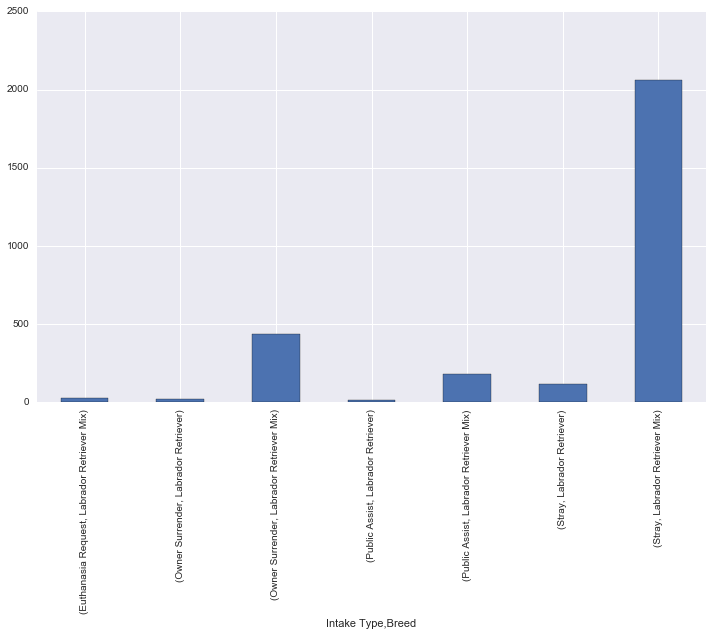

In [61]:
labradors.groupby(['Intake Type', 'Breed']).size().plot(kind='bar', figsize=(12,7))


In [64]:
labsintakegrp = labradors.groupby(['Intake Type', 'Breed']).size().reset_index()
labsintakegrp

,Intake Type,Breed,0
0,Euthanasia Request,Labrador Retriever Mix,23
1,Owner Surrender,Labrador Retriever,21
2,Owner Surrender,Labrador Retriever Mix,434
3,Public Assist,Labrador Retriever,11
4,Public Assist,Labrador Retriever Mix,177
5,Stray,Labrador Retriever,117
6,Stray,Labrador Retriever Mix,2063


In [79]:
labsintakegrp['Number'] = labsintakegrp[0]
labsintakegrp

,Intake Type,Breed,0,Number
0,Euthanasia Request,Labrador Retriever Mix,23,23
1,Owner Surrender,Labrador Retriever,21,21
2,Owner Surrender,Labrador Retriever Mix,434,434
3,Public Assist,Labrador Retriever,11,11
4,Public Assist,Labrador Retriever Mix,177,177
5,Stray,Labrador Retriever,117,117
6,Stray,Labrador Retriever Mix,2063,2063


In [80]:
del labsintakegrp[0]

In [81]:
labsintakegrp

,Intake Type,Breed,Number
0,Euthanasia Request,Labrador Retriever Mix,23
1,Owner Surrender,Labrador Retriever,21
2,Owner Surrender,Labrador Retriever Mix,434
3,Public Assist,Labrador Retriever,11
4,Public Assist,Labrador Retriever Mix,177
5,Stray,Labrador Retriever,117
6,Stray,Labrador Retriever Mix,2063


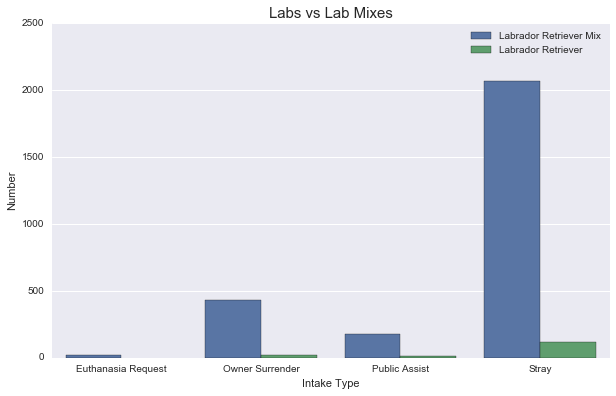

In [75]:
# set the figure size
fig = plt.subplots(figsize=(10,6))

# use seaborn, 'hue' is the key option
# naming the chart (p in this case) allows you to set options on the chart
p = sns.barplot(x="Intake Type", y=0, hue="Breed", data=labsintakegrp)
sns.despine(left=True, bottom=True)

# set options on the chart
p.set_xlabel('Intake Type')
p.set_ylabel('Number')
p.set_title("Labs vs Lab Mixes", fontsize=15)

# plot the chart
plt.legend()
plt.show()


In [77]:
labsintakegrp.unstack(0)

Intake Type  0        Euthanasia Request
             1           Owner Surrender
             2           Owner Surrender
             3             Public Assist
             4             Public Assist
             5                     Stray
             6                     Stray
Breed        0    Labrador Retriever Mix
             1        Labrador Retriever
             2    Labrador Retriever Mix
             3        Labrador Retriever
             4    Labrador Retriever Mix
             5        Labrador Retriever
             6    Labrador Retriever Mix
0            0                        23
             1                        21
             2                       434
             3                        11
             4                       177
             5                       117
             6                      2063
dtype: object

## Cat DataFrame

### Intakes among Cats

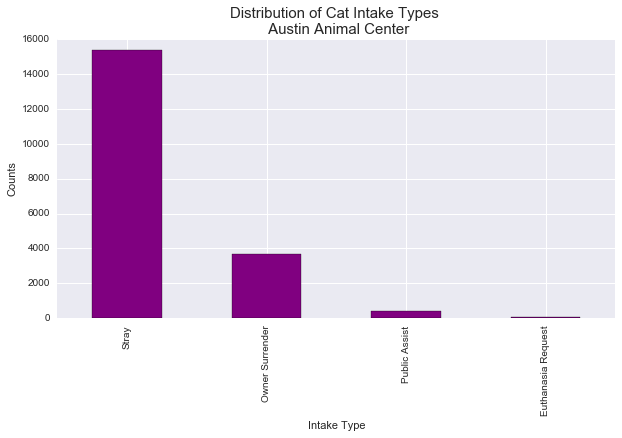

In [49]:
cats_intake["Intake Type"].value_counts().plot(kind='bar', figsize=(10,5), color ='purple')
plt.xlabel("Intake Type")
plt.ylabel("Counts")
plt.title("Distribution of Cat Intake Types \n Austin Animal Center", fontsize=15)

# Animal Outcomes

Description from Austin Open Data Portal (https://data.austintexas.gov/Health/Austin-Animal-Center-Outcomes-Version-1-DEMO/9t4d-g238)

Austin Animal Center Outcomes Version 1 DEMO

Animal Center Outcomes from Oct, 1st 2013 to present. Animal Center Outcomes from Oct, 1st 2013 to present. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. The Outcomes data set reflects that Austin, TX. is the largest "No Kill" city in the country.

This data set replaces all previous Animal Center Outcomes data sets.

THIS DATA SET IS STILL IN BETA.

In [65]:
animaloutcome_df = pd.read_csv('austin_animal_center_outcomes_version_1_demo.csv')

In [66]:
animaloutcome_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A659834,*Dudley,10/01/2013 09:31:00 AM,10/01/2013 09:31:00 AM,07/23/2013,Adoption,Foster,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black
1,A664235,NaN,10/01/2013 10:39:00 AM,10/01/2013 10:39:00 AM,09/24/2013,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
2,A664236,NaN,10/01/2013 10:44:00 AM,10/01/2013 10:44:00 AM,09/24/2013,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
3,A664237,NaN,10/01/2013 10:44:00 AM,10/01/2013 10:44:00 AM,09/24/2013,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
4,A664223,Moby,10/01/2013 11:03:00 AM,10/01/2013 11:03:00 AM,09/30/2009,Return to Owner,NaN,Dog,Neutered Male,4 years,Bulldog Mix,White


In [67]:
animaloutcome_df["Animal ID"].value_counts()

A706536    10
A694501     8
A671704     7
A683108     7
A616444     6
A688610     6
A695857     6
A593537     6
A701901     6
A690234     5
A681167     5
A593109     5
A623561     5
A703649     5
A691218     5
A623219     5
A667894     5
A613676     5
A664228     5
A719117     5
A668183     5
A663819     5
A677853     5
A701879     5
A704004     5
A700121     5
A707114     5
A704287     5
A712510     5
A462580     5
           ..
A708143     1
A689918     1
A689919     1
A718801     1
A711727     1
A718803     1
A717461     1
A694709     1
A731532     1
A719231     1
A731194     1
A704674     1
A704673     1
A704672     1
A704671     1
A704670     1
A716585     1
A720489     1
A708144     1
A704679     1
A731530     1
A694705     1
A699552     1
A694707     1
A694706     1
A694701     1
A699556     1
A699555     1
A699554     1
A728984     1
Name: Animal ID, dtype: int64

In [68]:
animaloutcome_df_dupsremoved = animaloutcome_df.drop_duplicates()

In [69]:
len(animaloutcome_df_dupsremoved)

51998

In [70]:
len(animaloutcome_df)

52005

In [71]:
animaloutcomes_df = animaloutcome_df_dupsremoved

### Animal Types

In [72]:
animaloutcomes_df["Animal Type"].value_counts()

Dog          29519
Cat          19472
Other         2793
Bird           206
Livestock        8
Name: Animal Type, dtype: int64

In [75]:
dog_outcomes = animaloutcomes_df[animaloutcomes_df["Animal Type"] == "Dog"]
dog_outcome.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A659834,*Dudley,10/01/2013 09:31:00 AM,10/01/2013 09:31:00 AM,07/23/2013,Adoption,Foster,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black
4,A664223,Moby,10/01/2013 11:03:00 AM,10/01/2013 11:03:00 AM,09/30/2009,Return to Owner,NaN,Dog,Neutered Male,4 years,Bulldog Mix,White
5,A663646,NaN,10/01/2013 11:12:00 AM,10/01/2013 11:12:00 AM,09/22/2010,Transfer,Partner,Dog,Neutered Male,3 years,Toy Poodle Mix,White
6,A663888,NaN,10/01/2013 11:13:00 AM,10/01/2013 11:13:00 AM,09/25/2011,Transfer,Partner,Dog,Spayed Female,2 years,Boxer Mix,Red/White
7,A663572,*Starla,10/01/2013 11:42:00 AM,10/01/2013 11:42:00 AM,09/21/2010,Adoption,NaN,Dog,Spayed Female,3 years,Anatol Shepherd Mix,White/Brown


In [76]:
cat_outcomes = animaloutcomes_df[animaloutcomes_df["Animal Type"] == "Cat"]
cat_outcome.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
1,A664235,NaN,10/01/2013 10:39:00 AM,10/01/2013 10:39:00 AM,09/24/2013,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
2,A664236,NaN,10/01/2013 10:44:00 AM,10/01/2013 10:44:00 AM,09/24/2013,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
3,A664237,NaN,10/01/2013 10:44:00 AM,10/01/2013 10:44:00 AM,09/24/2013,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
9,A656894,Jake,10/01/2013 11:53:00 AM,10/01/2013 11:53:00 AM,04/22/2013,Adoption,NaN,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Black
10,A661795,Blakie,10/01/2013 11:53:00 AM,10/01/2013 11:53:00 AM,03/25/2013,Adoption,NaN,Cat,Spayed Female,6 months,Domestic Shorthair Mix,Tortie


### Animal Type Outcomes Distribution

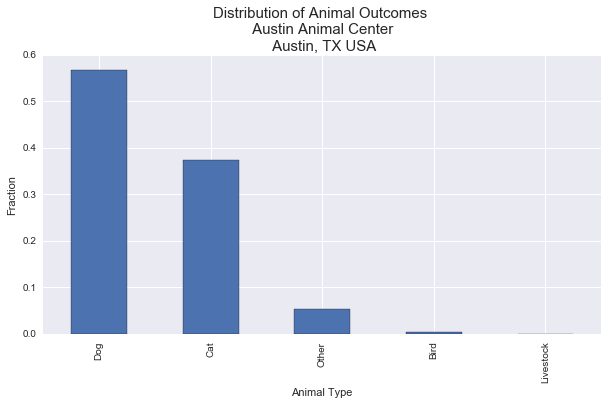

In [77]:
animaloutcomes_df["Animal Type"].value_counts(normalize=True).plot(kind='bar', figsize=(10,5))
plt.xlabel('Animal Type')
plt.ylabel('Fraction')
plt.title('Distribution of Animal Outcomes \n Austin Animal Center \n Austin, TX USA', fontsize=15)

### Outcome Type Distribution

In [78]:
animaloutcomes_df["Outcome Type"].value_counts()

Adoption           20940
Transfer           16310
Return to Owner     9513
Euthanasia          4534
Died                 441
Disposal             197
Missing               32
Relocate              12
Name: Outcome Type, dtype: int64

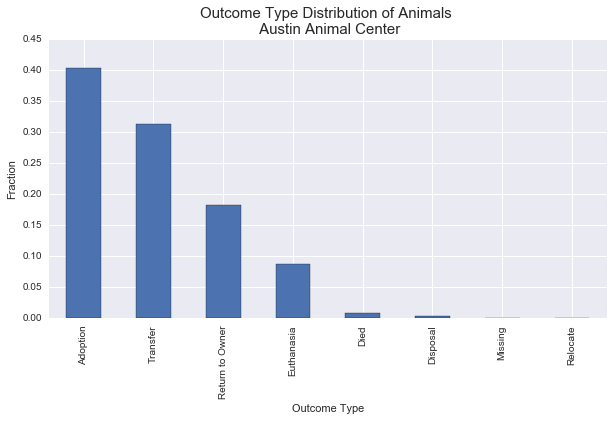

In [79]:
animaloutcomes_df["Outcome Type"].value_counts(normalize=True).plot(kind='bar', figsize=(10, 5))
plt.xlabel('Outcome Type')
plt.ylabel('Fraction')
plt.title('Outcome Type Distribution of Animals \n Austin Animal Center', fontsize=15)

### Which is adopted more, cats or dogs?

In [80]:
adoption = animaloutcomes_df[animaloutcomes_df['Outcome Type'] == 'Adoption']
print len(adoption)
print adoption.head(2)

20940
  Animal ID     Name                DateTime               MonthYear  \
0   A659834  *Dudley  10/01/2013 09:31:00 AM  10/01/2013 09:31:00 AM   
7   A663572  *Starla  10/01/2013 11:42:00 AM  10/01/2013 11:42:00 AM   

  Date of Birth Outcome Type Outcome Subtype Animal Type Sex upon Outcome  \
0    07/23/2013     Adoption          Foster         Dog    Neutered Male   
7    09/21/2010     Adoption             NaN         Dog    Spayed Female   

  Age upon Outcome                   Breed        Color  
0         2 months  Labrador Retriever Mix        Black  
7          3 years     Anatol Shepherd Mix  White/Brown  


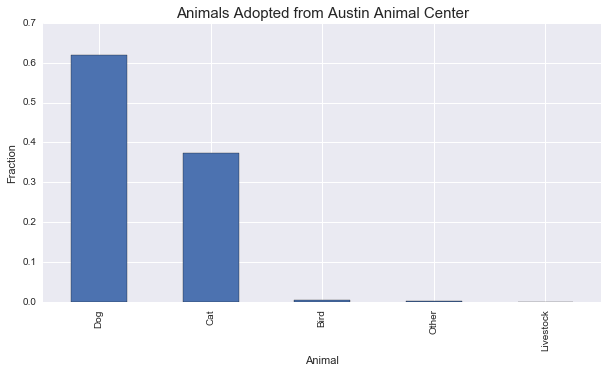

In [83]:
adoption["Animal Type"].value_counts(normalize=True).plot(kind='bar', figsize=(10,5))
plt.title("Animals Adopted from Austin Animal Center", fontsize=15)
plt.xlabel("Animal")
plt.ylabel("Fraction")

In [84]:
# There are more dogs to begin with anyway

### Looking at Duplicate Dog Adoptions

In [107]:
dog_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A659834,*Dudley,10/01/2013 09:31:00 AM,10/01/2013 09:31:00 AM,07/23/2013,Adoption,Foster,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black
4,A664223,Moby,10/01/2013 11:03:00 AM,10/01/2013 11:03:00 AM,09/30/2009,Return to Owner,NaN,Dog,Neutered Male,4 years,Bulldog Mix,White
5,A663646,NaN,10/01/2013 11:12:00 AM,10/01/2013 11:12:00 AM,09/22/2010,Transfer,Partner,Dog,Neutered Male,3 years,Toy Poodle Mix,White
6,A663888,NaN,10/01/2013 11:13:00 AM,10/01/2013 11:13:00 AM,09/25/2011,Transfer,Partner,Dog,Spayed Female,2 years,Boxer Mix,Red/White
7,A663572,*Starla,10/01/2013 11:42:00 AM,10/01/2013 11:42:00 AM,09/21/2010,Adoption,NaN,Dog,Spayed Female,3 years,Anatol Shepherd Mix,White/Brown


In [108]:
dog_outcomes["Animal ID"].value_counts()

A706536    10
A694501     8
A683108     7
A671704     7
A593537     6
A695857     6
A616444     6
A688610     6
A701901     6
A593109     5
A700121     5
A681167     5
A613676     5
A623219     5
A689279     5
A668183     5
A664228     5
A700396     5
A669782     5
A670612     5
A691218     5
A712510     5
A707114     5
A698638     5
A701879     5
A663819     5
A703649     5
A719117     5
A623561     5
A621164     5
           ..
A717975     1
A694124     1
A284639     1
A726790     1
A718622     1
A701916     1
A715537     1
A710720     1
A730398     1
A710723     1
A699080     1
A695695     1
A729680     1
A729681     1
A729683     1
A729685     1
A729686     1
A676056     1
A676057     1
A676054     1
A676052     1
A676051     1
A695753     1
A727772     1
A722305     1
A722307     1
A722300     1
A680183     1
A641632     1
A725894     1
Name: Animal ID, dtype: int64

In [109]:
dog_outcomes[dog_outcomes["Animal ID"] == 'A706536']

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
32182,A706536,Butch,07/03/2015 12:49:00 PM,07/03/2015 12:49:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
33259,A706536,Butch,07/20/2015 12:50:00 PM,07/20/2015 12:50:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
33830,A706536,Butch,07/30/2015 04:27:00 PM,07/30/2015 04:27:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
38634,A706536,Butch,10/28/2015 11:34:00 AM,10/28/2015 11:34:00 AM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
41445,A706536,Butch,12/26/2015 01:41:00 PM,12/26/2015 01:41:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
42159,A706536,Butch,01/11/2016 12:46:00 PM,01/11/2016 12:46:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
43733,A706536,Butch,02/19/2016 07:15:00 PM,02/19/2016 07:15:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
43833,A706536,Butch,02/22/2016 10:49:00 AM,02/22/2016 10:49:00 AM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
44949,A706536,Butch,03/18/2016 07:32:00 PM,03/18/2016 07:32:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White
45477,A706536,Butch,03/29/2016 02:23:00 PM,03/29/2016 02:23:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,English Bulldog,Tan/White


### Among dogs adopted, what is the most predominant breed?

In [85]:
dogs_adoption = dog_outcomes[dog_outcomes["Outcome Type"] == "Adoption"]

In [86]:
len(dogs_adoption)

12966

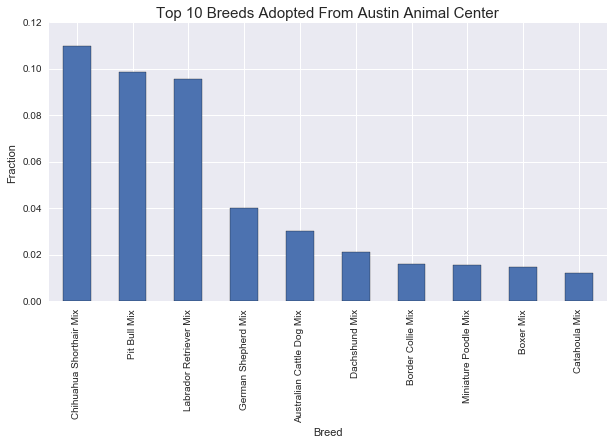

In [87]:
dogs_adoption.Breed.value_counts(normalize=True).head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Breeds Adopted From Austin Animal Center', fontsize=15)
plt.ylabel('Fraction')
plt.xlabel('Breed')

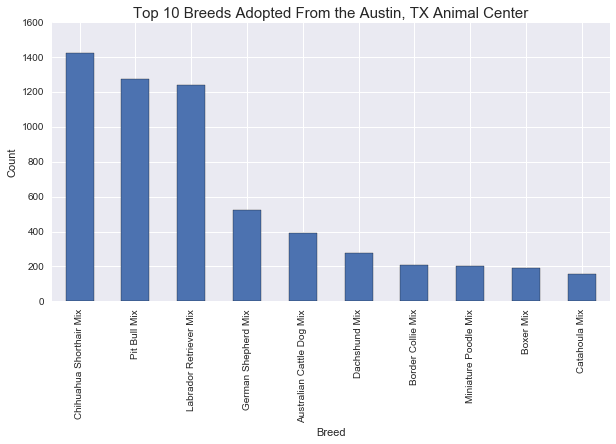

In [88]:
dogs_adoption.Breed.value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Breeds Adopted From the Austin, TX Animal Center', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Breed')

### Predominant Dog Breeds Returned to Owner

In [90]:
returntoowner = dog_outcomes[dog_outcome["Outcome Type"] == "Return to Owner"]

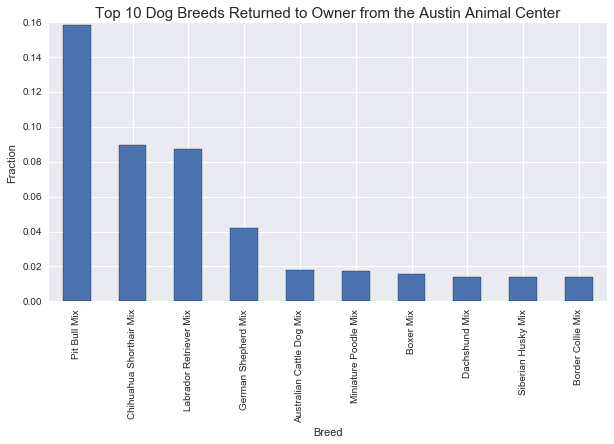

In [91]:
returntoowner.Breed.value_counts(normalize=True).head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Dog Breeds Returned to Owner from the Austin Animal Center', fontsize=15)
plt.ylabel('Fraction')
plt.xlabel('Breed')

In [92]:
len(returntoowner)

8580

## Merging the intakes and outcomes

In [93]:
intake_outcome1 = animaloutcomes_df.merge(animalintake_df, on="Animal ID", how='inner')

In [94]:
len(intake_outcome1)

61361

In [95]:
len(animaloutcomes_df)

51998

In [98]:
len(animalintakes_df)

52052

In [99]:
len(intake_outcome1.drop_duplicates())

61340

In [100]:
intake_outcome2 = animaloutcomes_df.merge(animalintake_df, on="Animal ID", how='outer')

In [101]:
len(intake_outcome2)

63077

In [102]:
intake_outcome3 = animaloutcomes_df.merge(animalintake_df, on="Animal ID", how='left')

In [103]:
len(intake_outcome3)

62190

In [104]:
intake_outcome4 = animaloutcomes_df.merge(animalintake_df, on="Animal ID", how='right')

In [105]:
len(intake_outcome4)

62248

In [106]:
intake_outcome1["Animal ID"].value_counts().head()

A706536    100
A694501     64
A671704     49
A683108     49
A593537     36
Name: Animal ID, dtype: int64

In [110]:
# How come Butch appears 100x?

In [113]:
butch = intake_outcome1[intake_outcome1["Animal ID"] == 'A706536']

In [114]:
butch.head()

,Animal ID,Name_x,DateTime_x,MonthYear_x,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_x,Sex upon Outcome,Age upon Outcome,...,DateTime_y,MonthYear_y,Found Location,Intake Type,Intake Condition,Animal Type_y,Sex upon Intake,Age upon Intake,Breed_y,Color_y
39861,A706536,Butch,07/03/2015 12:49:00 PM,07/03/2015 12:49:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,...,06/30/2015 10:55:00 AM,06/30/2015 10:55:00 AM,2820 S Lamar in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
39862,A706536,Butch,07/03/2015 12:49:00 PM,07/03/2015 12:49:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,...,07/20/2015 10:19:00 AM,07/20/2015 10:19:00 AM,5100 West Us Hwy 290 Svrd Wb in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
39863,A706536,Butch,07/03/2015 12:49:00 PM,07/03/2015 12:49:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,...,07/27/2015 04:02:00 PM,07/27/2015 04:02:00 PM,5100 West Ben White Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
39864,A706536,Butch,07/03/2015 12:49:00 PM,07/03/2015 12:49:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,...,10/21/2015 05:07:00 PM,10/21/2015 05:07:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White
39865,A706536,Butch,07/03/2015 12:49:00 PM,07/03/2015 12:49:00 PM,06/30/2010,Return to Owner,NaN,Dog,Neutered Male,5 years,...,12/20/2015 02:06:00 PM,12/20/2015 02:06:00 PM,5100 Us-290 in Austin (TX),Public Assist,Normal,Dog,Neutered Male,5 years,English Bulldog,Tan/White


## How many unique Animal IDs are there in the merged DF?

In [116]:
len(intake_outcome1["Animal ID"].unique())

47025

#### Finding out how many animals were taken in more than once:

In [117]:
len(animalintakes_df["Animal ID"].unique())

47912

In [119]:
len(animalintakes_df)

52052

In [120]:
len(animalintakes_df) - len(animalintakes_df["Animal ID"].unique())

4140

In [122]:
# 4140 animals were taken in multiple times

#### Finding out how many animals were adopted more than once:

In [118]:
len(animaloutcomes_df["Animal ID"].unique())

47854

In [123]:
len(animaloutcomes_df) - len(animaloutcomes_df["Animal ID"].unique())

4144

#### The numbers are near. Animals were taken in and adopted multiple times. 

#### How many animals go in and out multiple times?

#### How to remove these animals from the dataframes?

# Things to do next:

- Remove the animals that are repeatedly taken in and adopted from the intake and outcome dataframes
- Do the analysis separately on these grooups of animals

In [124]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A592454']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
11047,A592454,*Mabel,05/23/2014 05:00:00 PM,05/23/2014 05:00:00 PM,1724 Bunche Rd in Austin (TX),Stray,Normal,Dog,Spayed Female,5 years,Pit Bull Mix,Brown Brindle
47058,A592454,*Mabel,05/02/2016 07:53:00 PM,05/02/2016 07:53:00 PM,Austin (TX),Public Assist,Normal,Dog,Spayed Female,7 years,Pit Bull Mix,Brown Brindle


In [125]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A672093']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
9571,A672093,Boss,05/03/2014 10:26:00 PM,05/03/2014 10:26:00 PM,Halmark Dr. in Austin (TX),Stray,Normal,Dog,Intact Male,7 months,Pit Bull Mix,Tan
30322,A672093,Boss,06/03/2015 11:36:00 AM,06/03/2015 11:36:00 AM,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,1 year,Pit Bull Mix,Tan
50616,A672093,Boss,07/01/2016 08:33:00 AM,07/01/2016 08:33:00 AM,S Pleasant Valley And Riverside in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Pit Bull Mix,Tan


In [126]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A673271']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
6316,A673271,Tera,02/21/2014 11:54:00 AM,02/21/2014 11:54:00 AM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,7 months,German Shepherd/Labrador Retriever,Black/Brown
28080,A673271,Tera,05/01/2015 04:44:00 PM,05/01/2015 04:44:00 PM,5510 South Pleasent Valley in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,German Shepherd/Labrador Retriever,Black/Brown
44829,A673271,Tera,03/20/2016 06:01:00 PM,03/20/2016 06:01:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,German Shepherd/Labrador Retriever,Black/Brown
46360,A673271,Tera,04/21/2016 01:42:00 PM,04/21/2016 01:42:00 PM,Outside Jurisdiction,Owner Surrender,Normal,Dog,Spayed Female,2 years,German Shepherd/Labrador Retriever,Black/Brown
49291,A673271,Tera,06/06/2016 12:02:00 PM,06/06/2016 12:02:00 PM,Outside Jurisdiction,Owner Surrender,Normal,Dog,Spayed Female,2 years,German Shepherd/Labrador Retriever,Black/Brown


In [127]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A675019']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
7615,A675019,Scout,03/21/2014 03:00:00 PM,03/21/2014 03:00:00 PM,300 E 11Th St in Austin (TX),Stray,Normal,Dog,Neutered Male,1 year,Labrador Retriever Mix,Red/White
43527,A675019,Scout,02/20/2016 02:03:00 PM,02/20/2016 02:03:00 PM,3211 Panorama Vista Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,3 years,Labrador Retriever Mix,Red/White


In [128]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A715661']

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
48993,A715661,*Treble,06/01/2016 11:40:00 AM,06/01/2016 11:40:00 AM,1012 Arthur Stiles in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,Brown Brindle/White


In [ ]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A592454']

In [ ]:
animalintakes_df[animalintakes_df["Animal ID"] == 'A592454']